<a href="https://colab.research.google.com/github/AMJAMAITHILI/ML_LAB-141/blob/main/ML_LAB5%2C6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Embedded methods → Feature selection happens during model training itself.
Embedded methods automatically select the most useful features while fitting the model because of penalties (regularization) or feature importance scores.

Regularization is a technique in Machine Learning to prevent overfitting by adding a penalty term to the model’s loss function.

We minimize the Loss Function (like Mean Squared Error).

 With Regularization, we add a penalty for large weights:

Loss = Error (MSE) + λ ⋅ Penalty

λ (lambda) = regularization strength (a hyperparameter you set).

- Small λ → behaves like normal regression.
- Large λ → stronger penalty, smaller weights.


**Types of Regularization**
1. *L1 Regularization* (LASSO)
Penalty = sum of absolute values of weights.
Effect: Some weights become exactly zero → automatic feature selection.

Loss = MSE + λ ∑|wᵢ|

2. *L2 Regularization* (Ridge)
Penalty = sum of squares of weights.
Effect: Weights shrink close to zero, but rarely exactly zero. Keeps all features.

Loss = MSE + λ ∑wᵢ²

3. *Elastic Net*
Combination of L1 + L2.
Useful when features are correlated and some irrelevant.

Loss = MSE + λ₁ ∑|wᵢ| + λ₂ ∑wᵢ²

Embedded methods are models that perform selection/importance as part of training.

**LASSO** is an embedded feature-selector because the penalty forces some weights to zero during training.

**Ridge** is embedded shrinkage (keeps all features but reduces their impact).

**ElasticNet** is embedded selection + stability.

**Tree-based models** (Decision Trees, Random Forest) compute feature importances during model training (not by penalties but by splits that reduce impurity). They’re also embedded methods in the sense that training produces importance scores.

**Linear SVM**(with linear kernel): the learned weight vector indicates which features matter.


Linear Regression
MSE: 9.762853674412973
Coefficients: [[10.22660174]] 



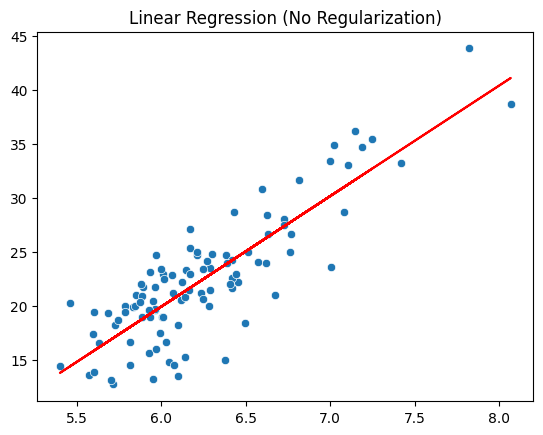

Lasso Regression
MSE: 34.709124595627884
Coefficients: [0.] 



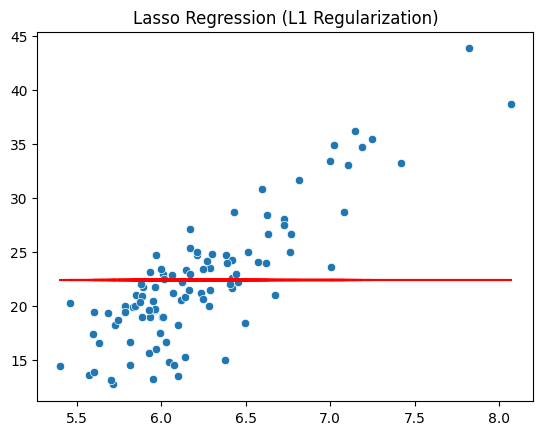

Ridge Regression
MSE: 25.96309109305436
Coefficients: [1.98542524] 



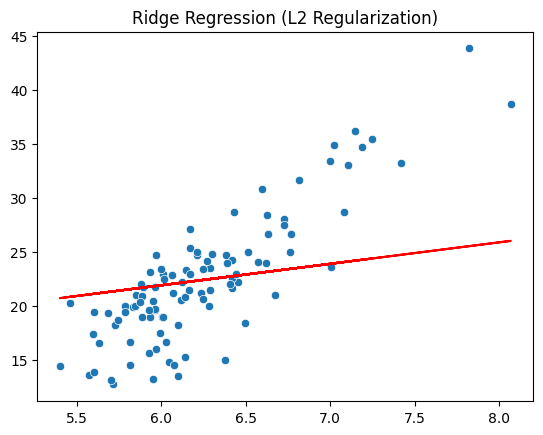

Elastic Net Regression
MSE: 23.54266734496628
Coefficients: [2.62596111] 



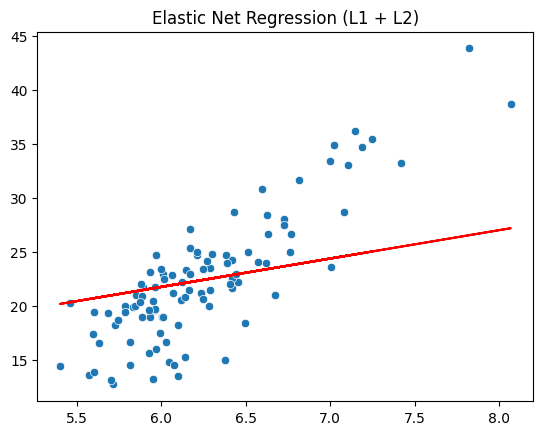

Decision Tree Feature Importances: [0.73501289 0.21270595 0.05228116] 

Random Forest Feature Importances: [0.74897257 0.2153692  0.03565823] 

SVM Coefficients (Feature Importance): [[ 4.28468508 -2.23088417 -0.04900556]] 



In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(URL, header=None)

# Single feature for regression examples
X = df.loc[:100, 5].values.reshape(-1, 1)
y = df.loc[:100, 13].values.reshape(-1, 1)

# Multiple features for tree/forest/SVM examples
X_multi = df.loc[:100, [5, 6, 7]].values
y_multi = df.loc[:100, 13].values

# 1. Linear Regression (No Regularization)
linear_reg = LinearRegression()
linear_reg.fit(X, y)
y_pred = linear_reg.predict(X)

print("Linear Regression")
print("MSE:", mean_squared_error(y, y_pred))
print("Coefficients:", linear_reg.coef_, "\n")

sns.scatterplot(x=X.ravel(), y=y.ravel())
plt.plot(X, y_pred, color="red")
plt.title("Linear Regression (No Regularization)")
plt.show()

# 2. Lasso Regression (L1)
lasso = Lasso(alpha=10)
lasso.fit(X, y)
y_pred = lasso.predict(X)

print("Lasso Regression")
print("MSE:", mean_squared_error(y, y_pred))
print("Coefficients:", lasso.coef_, "\n")

sns.scatterplot(x=X.ravel(), y=y.ravel())
plt.plot(X, y_pred, color="red")
plt.title("Lasso Regression (L1 Regularization)")
plt.show()

# 3. Ridge Regression (L2)
ridge = Ridge(alpha=100)
ridge.fit(X, y)
y_pred = ridge.predict(X)

print("Ridge Regression")
print("MSE:", mean_squared_error(y, y_pred))
print("Coefficients:", ridge.coef_, "\n")

sns.scatterplot(x=X.ravel(), y=y.ravel())
plt.plot(X, y_pred, color="red")
plt.title("Ridge Regression (L2 Regularization)")
plt.show()

# 4. Elastic Net (L1 + L2)
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X, y)
y_pred = elastic_net.predict(X)

print("Elastic Net Regression")
print("MSE:", mean_squared_error(y, y_pred))
print("Coefficients:", elastic_net.coef_, "\n")

sns.scatterplot(x=X.ravel(), y=y.ravel())
plt.plot(X, y_pred, color="red")
plt.title("Elastic Net Regression (L1 + L2)")
plt.show()

# 5. Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_multi, y_multi)
print("Decision Tree Feature Importances:", dt.feature_importances_, "\n")

# 6. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_multi, y_multi)
print("Random Forest Feature Importances:", rf.feature_importances_, "\n")

# 7. Linear SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)

svm = SVR(kernel="linear")
svm.fit(X_scaled, y_multi)

print("SVM Coefficients (Feature Importance):", svm.coef_, "\n")


**Gradient Descent** as a method to estimate coefficients (parameters/weights) by minimizing a loss function (in classification you mentioned Log-Loss, in regression it’s usually MSE).

Steps:

->Start with some initial parameter values.

->Compute the gradient of the loss function (slope/derivative w.r.t. each parameter).

->Update the parameters in the opposite direction of the gradient, scaled by a step size (learning rate α).

->Repeat until the loss is minimized.

->The gradient shows where the function increases the fastest. Going the opposite way means moving toward the minimum.

**Types of Gradient Descent**

*Batch Gradient Descent* (BGD):

Uses the entire dataset to calculate gradients.

Update happens once per epoch (after going through all samples).

Accurate but slow for large datasets.

*Stochastic Gradient Descent*(SGD):

Uses one random sample at a time to calculate gradient and update parameters.

Much faster, but updates are noisy.

Works well for large datasets.

*Mini-Batch Gradient Descent*:

A middle ground between Batch and SGD.

Splits dataset into small batches (say 32, 64 samples).

Update per batch.

Most popular in practice (especially in deep learning).

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardize features (important for GD!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Stochastic Gradient Descent (SGD) - with default learning rate

sgd_reg = SGDRegressor(max_iter=200, eta0=0.01, learning_rate='constant', random_state=42)
sgd_reg.fit(X_train, y_train)
y_pred_sgd = sgd_reg.predict(X_test)
sgd_mse = mean_squared_error(y_test, y_pred_sgd)

# 2. Gradient Descent (Approx Batch GD) - more iterations + averaging

gd_reg = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='constant',
                      average=True, random_state=42)
gd_reg.fit(X_train, y_train)
y_pred_gd = gd_reg.predict(X_test)
gd_mse = mean_squared_error(y_test, y_pred_gd)

# 3. Trying different learning rates

learning_rates = [0.0001, 0.001, 0.01]
results = {}
for lr in learning_rates:
    reg = SGDRegressor(max_iter=500, eta0=lr, learning_rate='constant', random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    results[lr] = mean_squared_error(y_test, y_pred)

print("\nMSE Comparison (Lower is better):")
print(f"SGD (stochastic, 200 epochs, lr=0.01): {sgd_mse:.4f}")
print(f"GD Approx (batch-like, 1000 epochs, lr=0.01): {gd_mse:.4f}")

for lr, mse in results.items():
    print(f"Learning rate={lr}, MSE={mse:.4f}")



MSE Comparison (Lower is better):
SGD (stochastic, 200 epochs, lr=0.01): 597216466054831407104.0000
GD Approx (batch-like, 1000 epochs, lr=0.01): 24803972824667983872.0000
Learning rate=0.0001, MSE=0.5621
Learning rate=0.001, MSE=3640814.4877
Learning rate=0.01, MSE=597216466054831407104.0000
